# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1. There is a strong correlation between latitude and temperature 
2. This is very little correlation between latitude and humidity, cloudiness, and wind speed

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
cities

['yellowknife',
 'qaqortoq',
 'guerrero negro',
 'saldanha',
 'georgetown',
 'ushuaia',
 'vaini',
 'bluff',
 'geraldton',
 'byron bay',
 'busselton',
 'nikolskoye',
 'khatanga',
 'sayula',
 'seoul',
 'shingu',
 'faanui',
 'tiksi',
 'araria',
 'nanortalik',
 'albany',
 'ilulissat',
 'palabuhanratu',
 'rikitea',
 'dong hoi',
 'hobart',
 'chokurdakh',
 'clyde river',
 'new norfolk',
 'kabanjahe',
 'kimbe',
 'zhanaozen',
 'mar del plata',
 'mizdah',
 'salina',
 'ballina',
 'qaanaaq',
 'jamestown',
 'saint george',
 'lillooet',
 'balkanabat',
 'mataura',
 'cidreira',
 'dikson',
 'atuona',
 'puerto carreno',
 'salme',
 'port alfred',
 'mehamn',
 'villamaria',
 'taolanaro',
 'kawalu',
 'alice springs',
 'nieuw amsterdam',
 'hermanus',
 'saint-philippe',
 'vila velha',
 'tselinnoye',
 'leningradskiy',
 'kapaa',
 'punta arenas',
 'tambopata',
 'zarubino',
 'jinchengjiang',
 'micheweni',
 'luanda',
 'puerto ayora',
 'broome',
 'palu',
 'ust-omchug',
 'illoqqortoormiut',
 'cockburn town',
 'gamba

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_exist = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")
print("-------------------")
for x in range(len(cities)):
    response = requests.get(query_url + cities[x]).json()
    try:
        cities_exist.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {x} | {cities[x]}")
    except:
        print("City not found. Skipping...")
        pass
print("-------------------")
print("Data Retrieval Complete")
print("-------------------")

Beginning Data Retrieval
-------------------
Processing Record 0 | yellowknife
Processing Record 1 | qaqortoq
Processing Record 2 | guerrero negro
Processing Record 3 | saldanha
Processing Record 4 | georgetown
Processing Record 5 | ushuaia
Processing Record 6 | vaini
Processing Record 7 | bluff
Processing Record 8 | geraldton
Processing Record 9 | byron bay
Processing Record 10 | busselton
Processing Record 11 | nikolskoye
Processing Record 12 | khatanga
Processing Record 13 | sayula
Processing Record 14 | seoul
Processing Record 15 | shingu
Processing Record 16 | faanui
Processing Record 17 | tiksi
Processing Record 18 | araria
Processing Record 19 | nanortalik
Processing Record 20 | albany
Processing Record 21 | ilulissat
City not found. Skipping...
Processing Record 23 | rikitea
Processing Record 24 | dong hoi
Processing Record 25 | hobart
Processing Record 26 | chokurdakh
Processing Record 27 | clyde river
Processing Record 28 | new norfolk
Processing Record 29 | kabanjahe
Process

Processing Record 252 | kuytun
Processing Record 253 | tocopilla
Processing Record 254 | port macquarie
Processing Record 255 | ribeira grande
Processing Record 256 | iqaluit
Processing Record 257 | perth
Processing Record 258 | morondava
Processing Record 259 | chute-aux-outardes
Processing Record 260 | yulara
Processing Record 261 | naples
Processing Record 262 | vanavara
Processing Record 263 | novokizhinginsk
Processing Record 264 | praia
Processing Record 265 | nautla
Processing Record 266 | roma
City not found. Skipping...
Processing Record 268 | san vicente
Processing Record 269 | ossora
Processing Record 270 | vestmanna
Processing Record 271 | weligama
Processing Record 272 | luderitz
Processing Record 273 | saint anthony
Processing Record 274 | dunedin
Processing Record 275 | kopervik
Processing Record 276 | moose factory
Processing Record 277 | faya
Processing Record 278 | vestmannaeyjar
Processing Record 279 | dire
Processing Record 280 | iberia
Processing Record 281 | progr

Processing Record 504 | sao paulo de olivenca
Processing Record 505 | bairiki
Processing Record 506 | najran
Processing Record 507 | gorgan
Processing Record 508 | dovers
Processing Record 509 | sola
Processing Record 510 | dori
Processing Record 511 | port lincoln
Processing Record 512 | belaya gora
City not found. Skipping...
Processing Record 514 | srandakan
Processing Record 515 | paragominas
City not found. Skipping...
Processing Record 517 | provideniya
Processing Record 518 | bowmore
Processing Record 519 | hoopstad
Processing Record 520 | svetlyy
Processing Record 521 | yumen
Processing Record 522 | lagoa
Processing Record 523 | namwala
Processing Record 524 | rio gallegos
Processing Record 525 | rawah
Processing Record 526 | gawler
City not found. Skipping...
Processing Record 528 | tilichiki
Processing Record 529 | isangel
Processing Record 530 | kautokeino
Processing Record 531 | saint-joseph
Processing Record 532 | dabat
Processing Record 533 | bang khla
Processing Record 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
with open(output_data_file, 'w') as f:
    f.write("Cities:")
    f.write('\n')
    f.write(f'{cities_exist}')
    f.write('\n')
    f.write("Latitude:")
    f.write('\n')
    f.write(f'{lat}')
    f.write('\n')
    f.write("Longitude:")
    f.write('\n')
    f.write(f'{lng}')
    f.write('\n')
    f.write("Max Temperature:")
    f.write('\n')
    f.write(f'{temp}')
    f.write('\n')
    f.write("Humidity:")
    f.write('\n')
    f.write(f'{humidity}')
    f.write('\n')
    f.write("Cloudiness:")
    f.write('\n')
    f.write(f'{cloudiness}')
    f.write('\n')
    f.write("Wind Speed:")
    f.write('\n')
    f.write(f'{wind_speed}')
    f.write('\n')
    f.write("Country:")
    f.write('\n')
    f.write(f'{country}')
    f.write('\n')
    f.write("Date:")
    f.write('\n')
    f.write(f'{date}')

In [5]:
city_dict = {
    "City": cities_exist,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,12.72,57,20,13.80,CA,1649731284
1,Qaqortoq,60.7167,-46.0333,31.17,53,76,12.71,GL,1649731437
2,Guerrero Negro,27.9769,-114.0611,60.44,79,0,13.11,MX,1649731438
3,Saldanha,-33.0117,17.9442,62.65,55,0,5.97,ZA,1649731438
4,George Town,5.4112,100.3354,87.73,74,20,5.01,MY,1649731439


In [6]:
city_data.to_csv(output_data_file)

In [7]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.490236,18.276542,59.193509,70.338182,57.149091,8.358527,1.649732e+09
std,33.249648,90.377171,21.979629,21.343709,39.027051,5.671303,9.682045e+01
min,-54.800000,-179.166700,-9.170000,5.000000,0.000000,0.000000,1.649731e+09
25%,-8.692375,-62.169225,42.720000,60.250000,20.000000,4.000000,1.649731e+09
50%,22.281200,20.847950,63.870000,75.000000,69.000000,7.000000,1.649732e+09
75%,47.470675,99.435200,77.105000,85.750000,100.000000,11.500000,1.649732e+09
max,78.218600,179.316700,96.640000,100.000000,100.000000,38.700000,1.649732e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humid = city_data.loc[city_data["Humidity"] > 100, :]
humid.index

Int64Index([], dtype='int64')

In [9]:
# no cities with humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

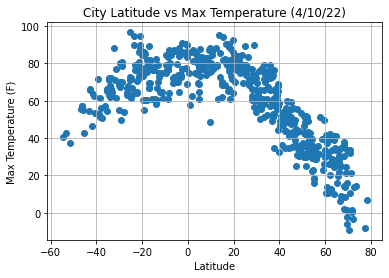

In [10]:
lat = city_data["Lat"]
temp = city_data["Max Temp"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Max Temperature (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("LatitudeVsTemp")
plt.show()

In [ ]:
#This plot shows the max temperature of cities that are located at various latitudes. The temperature increases as you get closer to the equator.

## Latitude vs. Humidity Plot

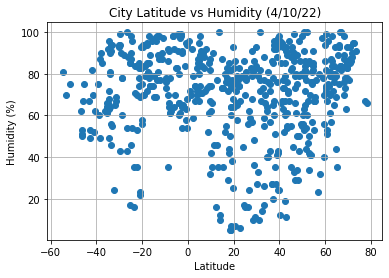

In [11]:
lat = city_data["Lat"]
temp = city_data["Humidity"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Humidity (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("LatitudeVsHumidity")
plt.show()

In [ ]:
#This plot shows the humidity of cities that are located at various latitudes. There are various humidity levels at all latitudes.

## Latitude vs. Cloudiness Plot

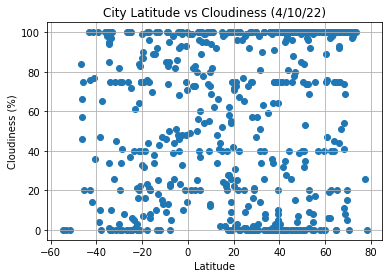

In [12]:
lat = city_data["Lat"]
temp = city_data["Cloudiness"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Cloudiness (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("LatitudeVsCloudiness")
plt.show()

In [ ]:
#This plot shows the cloudiness of cities that are located at various latitudes. There are various levels of cloudiness at all latitudes. 

## Latitude vs. Wind Speed Plot

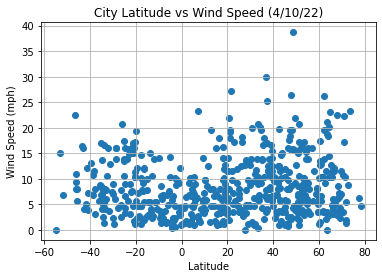

In [13]:
lat = city_data["Lat"]
temp = city_data["Wind Speed"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Wind Speed (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("LatitudeVsWindSpeed")
plt.show()

In [ ]:
#This plot shows the wind speed of cities that are located at various latitudes. There are various wind speeds at all latitudes. 

## Linear Regression

In [14]:
northern = city_data.loc[city_data["Lat"] >= 0.00, :]
southern = city_data.loc[city_data["Lat"] < 0.00, :]

The r-value is: 0.7942963594899846


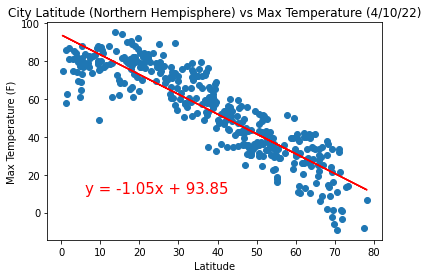

In [15]:
lat = northern["Lat"]
temp = northern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(lat, temp)
plt.title("City Latitude (Northern Hempisphere) vs Max Temperature (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsTemp(North)")
plt.show()

In [ ]:
#There is a strong correlation between latitude and max temperature in the northern hempisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4036499251409947


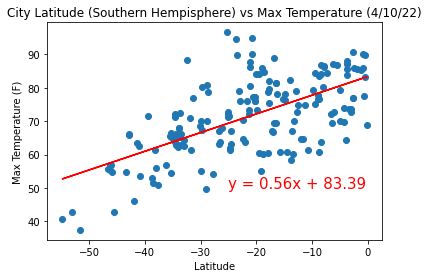

In [16]:
lat = southern["Lat"]
temp = southern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.scatter(lat, temp)
plt.title("City Latitude (Southern Hempisphere) vs Max Temperature (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsTemp(South)")
plt.show()

In [ ]:
#There is a moderate correlation between latitude and max temperature in the southern hempisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.027322354823927968


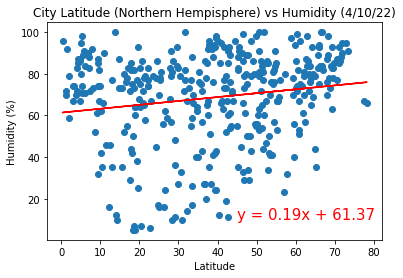

In [17]:
lat = northern["Lat"]
y_value = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Northern Hempisphere) vs Humidity (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsHumidity(North)")
plt.show()

In [ ]:
#There is very weak correlation between latitude and humidity in the northern hempisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04748377099881034


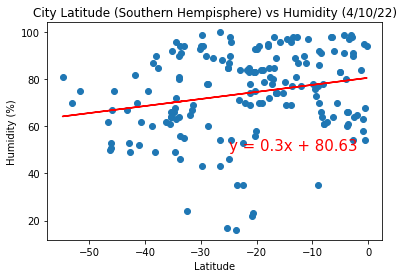

In [18]:
lat = southern["Lat"]
y_value = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Southern Hempisphere) vs Humidity (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsHumidity(South)")
plt.show()

In [ ]:
#There is very weak correlation between latitude and humidity in the southern hempisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.010948002815664104


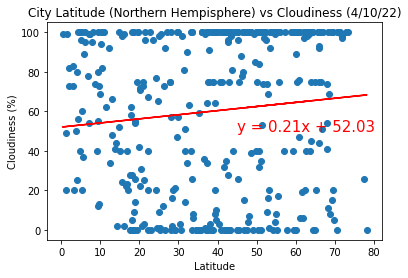

In [19]:
lat = northern["Lat"]
y_value = northern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Northern Hempisphere) vs Cloudiness (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsCloudiness(North)")
plt.show()

In [ ]:
#There is very weak correlation between latitude and cloudiness in the northern hempisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006012900973058146


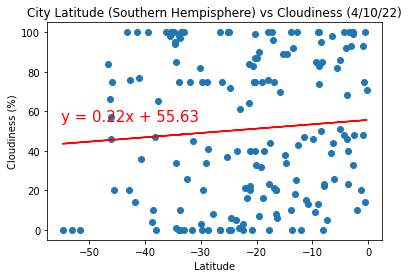

In [20]:
lat = southern["Lat"]
y_value = southern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Southern Hempisphere) vs Cloudiness (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsCloudiness(South)")
plt.show()

In [ ]:
#There is very weak correlation between latitude and cloudiness in the southern hempisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.020691137370699386


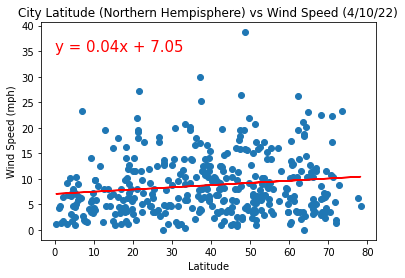

In [21]:
lat = northern["Lat"]
y_value = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Northern Hempisphere) vs Wind Speed (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsWindSpeed(North)")
plt.show()

In [ ]:
#There is very weak correlation between latitude and wind speed in the northern hempisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08383907222937205


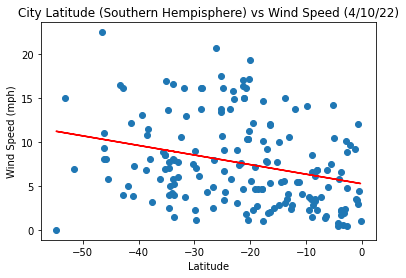

In [22]:
lat = southern["Lat"]
y_value = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Southern Hempisphere) vs Wind Speed (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsWindSpeed(South)")
plt.show()

In [ ]:
#There is very weak correlation between latitude and wind speed in the southern hempisphere. 